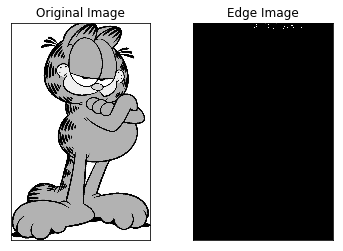

In [37]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
  
img = cv2.imread('images/garfield.jpg',0)
edges = cv2.Canny(img,100,200)
 
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
#for edge in edges:
e1 = np.zeros(edges.shape)
e1[0:50] = edges[0:50]
plt.imshow(e1,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
  
plt.show()

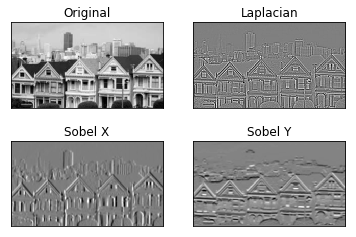

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# loading image
#img0 = cv2.imread('SanFrancisco.jpg',)
img0 = cv2.imread('images/house.jpg',)

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()


In [8]:
from PIL import Image, ImageFilter

In [31]:
img = Image.open('images/garfield.jpg')
img = img.filter(ImageFilter.FIND_EDGES())
img = img.filter(ImageFilter.SMOOTH())
print(img)
img.show()



<PIL.Image.Image image mode=RGB size=1024x1595 at 0x7F85211537B8>


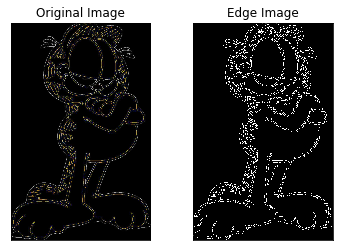

In [30]:
img = np.array(img)
edges = cv2.Canny(img,100,200)
 
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
  
plt.show()

In [27]:
img2 = cv2.imread('images/garfield.jpg',0)

In [29]:
type(img)

PIL.Image.Image

In [39]:
import numpy as np
import cv2
 
im = cv2.imread('images/garfield.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [43]:
dest = np.array(im.shape)
cv2.drawContours(im, contours, 3, (0,255,0), 3)
plt.imshow()

TypeError: imshow() missing 1 required positional argument: 'X'

In [56]:
img = cv2.imread('images/garfield.jpg');

if not img is None:
    imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY);
    ret,thresh = cv2.threshold(imgray,127,255,0);
    i, contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE);

    #draw a three pixel wide outline 
    z = cv2.drawContours(i,contours,-1,(0,255,0),3);
    #imshow(z)
    cv2.waitKey(0)

In [12]:
import math
def split_item(item, thresh):
    items = []
    length = len(item)
    if length > thresh:
        num_new_items = math.ceil(length/thresh)
        print(num_new_items)
        start = 0
        for i in range(num_new_items):
            end = start+thresh
            if end > length:
                end = length
            items.append(item[start:end])
            start = start + thresh
    return items

items = split_item([1, 2, 3, 4], 2)
print(items)

2
[[1, 2], [3, 4]]


In [29]:
import numpy as np
import cv2

im = cv2.imread('images/Spongebob_SquarePants.jpg')
im = cv2.resize(im, (700, 700))
#imCopy = im.copy()
imCopy = np.zeros(im.shape)
imgray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy =  cv2.findContours(thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

contours = [cv2.approxPolyDP(cnt, 3, True) for cnt in contours]

new_contours = []
#for cont in contours:
#    new_contours = new_contours + split_item(cont, 10)
    
#contours = new_contours

contours = np.array(sorted(contours, key=len, reverse=True))



for i, c in enumerate(contours):
    #if i == 1:
    #    break
        
    cv2.drawContours(imCopy,contours,i,(0,255,0))
    cv2.imshow('draw contours',imCopy)
    cv2.waitKey(0)


#cv2.waitKey(0)

cv2.destroyAllWindows()

'''

def update(levels):
    vis = np.zeros((im.shape[0], im.shape[1], 3), np.uint8)
    levels = levels - 3
    cv2.drawContours( vis, contours, (-1, 2)[levels <= 0], (128,255,255),
        3, cv2.LINE_AA, hierarchy, abs(levels) )
    cv2.imshow('contours', vis)
update(7)
cv2.createTrackbar( "levels+3", "contours", 3, 7, update )
#cv.imshow('image', img)
cv2.waitKey()
cv2.destroyAllWindows()
#cv2.drawContours(imCopy,contours,-1,(0,255,0))
#cv2.imshow('draw contours',imCopy)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
'''

'\n\ndef update(levels):\n    vis = np.zeros((im.shape[0], im.shape[1], 3), np.uint8)\n    levels = levels - 3\n    cv2.drawContours( vis, contours, (-1, 2)[levels <= 0], (128,255,255),\n        3, cv2.LINE_AA, hierarchy, abs(levels) )\n    cv2.imshow(\'contours\', vis)\nupdate(7)\ncv2.createTrackbar( "levels+3", "contours", 3, 7, update )\n#cv.imshow(\'image\', img)\ncv2.waitKey()\ncv2.destroyAllWindows()\n#cv2.drawContours(imCopy,contours,-1,(0,255,0))\n#cv2.imshow(\'draw contours\',imCopy)\n#cv2.waitKey(0)\n#cv2.destroyAllWindows()\n'

In [30]:
st = ''
for x in reversed(contours[0]):
    st += ' L {},{}'.format(x[0][0], x[0][1])
print(st)
print(len(contours[0]))

 L 353,55 L 348,70 L 329,68 L 327,54 L 319,53 L 320,70 L 297,79 L 283,65 L 279,69 L 290,84 L 274,105 L 250,90 L 255,74 L 250,71 L 241,87 L 216,86 L 215,70 L 208,69 L 207,88 L 185,98 L 172,85 L 166,90 L 178,103 L 160,136 L 160,156 L 170,179 L 174,176 L 165,156 L 167,129 L 179,109 L 201,94 L 234,90 L 249,94 L 269,107 L 282,127 L 285,154 L 271,183 L 240,201 L 208,200 L 211,206 L 233,207 L 256,200 L 278,182 L 285,170 L 304,183 L 290,189 L 293,193 L 331,175 L 358,153 L 374,152 L 384,160 L 376,179 L 353,196 L 330,204 L 284,210 L 318,211 L 354,201 L 377,213 L 332,231 L 289,238 L 251,236 L 190,213 L 196,212 L 195,208 L 182,210 L 168,220 L 169,226 L 183,215 L 185,241 L 199,274 L 222,301 L 250,321 L 300,323 L 337,308 L 349,295 L 341,264 L 352,261 L 352,229 L 387,213 L 358,198 L 386,173 L 398,142 L 399,122 L 385,91 L 357,72 L 361,54
86


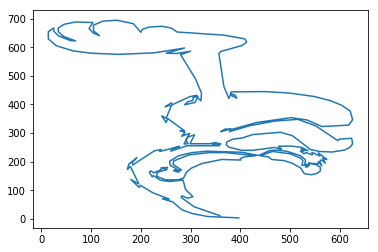

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt
X = [x[0][0] for x in reversed(contours[0])]
Y = [x[0][1] for x in reversed(contours[0])]
plt.plot(X, Y)

In [20]:
#len(contours[0])
#dict_lengths = {len(cont):cont for cont in contours}
#print(dict_lengths.keys())
lic = np.array(sorted(contours, key=len, reverse=True))


1


In [2]:
from __future__ import print_function
import sys
PY3 = sys.version_info[0] == 3

if PY3:
    xrange = range

import numpy as np
import cv2 as cv

def make_image():
    img = np.zeros((500, 500), np.uint8)
    black, white = 0, 255
    for i in xrange(6):
        dx = int((i%2)*250 - 30)
        dy = int((i/2.)*150)

        if i == 0:
            for j in xrange(11):
                angle = (j+5)*np.pi/21
                c, s = np.cos(angle), np.sin(angle)
                x1, y1 = np.int32([dx+100+j*10-80*c, dy+100-90*s])
                x2, y2 = np.int32([dx+100+j*10-30*c, dy+100-30*s])
                cv.line(img, (x1, y1), (x2, y2), white)

        cv.ellipse( img, (dx+150, dy+100), (100,70), 0, 0, 360, white, -1 )
        cv.ellipse( img, (dx+115, dy+70), (30,20), 0, 0, 360, black, -1 )
        cv.ellipse( img, (dx+185, dy+70), (30,20), 0, 0, 360, black, -1 )
        cv.ellipse( img, (dx+115, dy+70), (15,15), 0, 0, 360, white, -1 )
        cv.ellipse( img, (dx+185, dy+70), (15,15), 0, 0, 360, white, -1 )
        cv.ellipse( img, (dx+115, dy+70), (5,5), 0, 0, 360, black, -1 )
        cv.ellipse( img, (dx+185, dy+70), (5,5), 0, 0, 360, black, -1 )
        cv.ellipse( img, (dx+150, dy+100), (10,5), 0, 0, 360, black, -1 )
        cv.ellipse( img, (dx+150, dy+150), (40,10), 0, 0, 360, black, -1 )
        cv.ellipse( img, (dx+27, dy+100), (20,35), 0, 0, 360, white, -1 )
        cv.ellipse( img, (dx+273, dy+100), (20,35), 0, 0, 360, white, -1 )
    return img

if __name__ == '__main__':
    print(__doc__)

    #img = make_image()
    img = cv.imread('images/garfield.jpg')
    img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    img = cv.resize(img, (500, 500))
    h, w = img.shape[:2]

    i, contours0, hierarchy = cv.findContours( img.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    #cv.imshow('image', i)
    contours = [cv.approxPolyDP(cnt, 3, True) for cnt in contours0]

    def update(levels):
        vis = np.zeros((h, w, 3), np.uint8)
        levels = levels - 3
        cv.drawContours( vis, contours, (-1, 2)[levels <= 0], (128,255,255),
            3, cv.LINE_AA, hierarchy, abs(levels) )
        cv.imshow('contours', vis)
    update(3)
    cv.createTrackbar( "levels+3", "contours", 3, 7, update )
    cv.imshow('image', img)
    cv.waitKey()
    cv.destroyAllWindows()

Automatically created module for IPython interactive environment
